In [4]:
import quimb as qu
import quimb.tensor as qtn
from cxu import *
from quimb.experimental.cluster_update import *

In [21]:
Lx = 4
Ly = 4
D = 4
ham = qtn.ham_2d_heis(
    Lx, Ly, j=1
)

psi0 = qtn.PEPS.rand(
    Lx, Ly, bond_dim=D, phys_dim=2
)

# gauges = {}
# psi0.gauge_all_simple_(100, 1e-6, smudge=1e-6, damping=1/3, gauges=gauges, progbar=True)
# print(psi0.normalize_simple(gauges))
# psi0.gauge_simple_insert(gauges, True)



# cxu0._gauges = gauges

su0 = qtn.SimpleUpdate(
    psi0,
    ham,
    chi=256,
    compute_energy_fn = lambda x: x.get_state().compute_local_expectation(
        ham.terms,
        normalized=True
    )/(Lx * Ly),
    compute_energy_every=25,
)

su0.evolve(50, 0.3)
su0.evolve(50, 0.1)
su0.evolve(50, 0.05)

n=150, tau=0.05, energy~-0.552999: 100%|##########| 50/50 [00:24<00:00,  2.04it/s]


In [ ]:
import random


0.6000591914274087

In [ ]:
cxu0 = ClusterUpdateGen(
    psi0,
    ham,
    max_distance=2,
    compute_energy_fn = lambda x: x.get_state().compute_local_expectation(
        ham.terms,
        normalized=True
    )/(Lx * Ly),
    compute_energy_every=25,
)

cxu0.evolve(50, 0.3)
cxu0.evolve(50, 0.1)
cxu0.evolve(50, 0.05)

n=0, tau=0, energy~0.0078404:   0%|          | 0/50 [00:15<?, ?it/s]/home/sijingdu/TNVMC/VMC_code/mpsds/mpsds/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
n=50, tau=0.3, max|dS|=0, energy~-0.525807: 100%|##########| 50/50 [01:29<00:00,  1.80s/it]
n=100, tau=0.1, max|dS|=0, energy~-0.527227: 100%|##########| 50/50 [00:45<00:00,  1.09it/s]
n=150, tau=0.05, max|dS|=0, energy~-0.523118: 100%|##########| 50/50 [00:44<00:00,  1.13it/s]


In [8]:
energy_exact = qu.groundenergy(qu.ham_heis_2D(4, 4, sparse=True)) / (4 * 4)
energy_exact

np.float64(-0.5743254415745598)

In [9]:
psi_cxu = cxu0.get_state()
psi_su = su0.get_state()
E_cxu = psi_cxu.compute_local_expectation(
    ham.terms,
    cutoff=0.0,
    max_bond=256,
    normalized=True
)

E_su = psi_su.compute_local_expectation(
    ham.terms,
    cutoff=0.0,
    max_bond=256,
    normalized=True
)

E_cxu, E_su

(np.float64(-8.369895049770028), np.float64(-9.006739875789053))

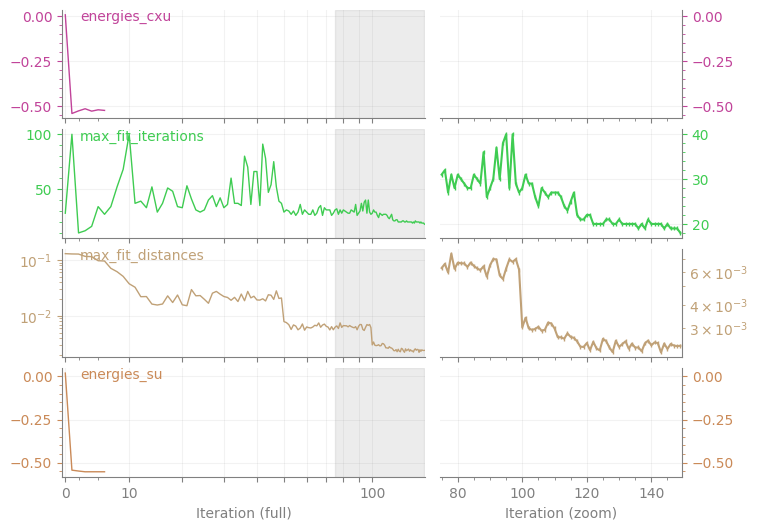

(<Figure size 800x606.287 with 8 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: xlabel='Iteration (full)'>,
         <Axes: xlabel='Iteration (zoom)'>]], dtype=object))

In [22]:
data_cxu = {}
data_cxu["max_fit_iterations"] = cxu0.max_fit_iterations
data_cxu["max_fit_distances"] = {
    "y": cxu0.max_fit_distances,
    "yscale": "log",
}
data_cxu["energies"] = cxu0.energies

data_su = {}
data_su['energies'] = su0.energies

qu.plot_multi_series_zoom(
    {
        'energies_cxu': data_cxu['energies'],
        
        'max_fit_iterations': data_cxu['max_fit_iterations'],
        'max_fit_distances': data_cxu['max_fit_distances'],
        'energies_su': data_su['energies'],
    }
)
